In [1]:
from qiskit_aer import AerSimulator
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.compiler import transpile
from qiskit.quantum_info import Operator

import matplotlib.pyplot as plt

import numpy as np

def visualize_result(res):
    n_qubit = len(list(res.keys())[0])
    for i in range(2 ** n_qubit):
        label ="{0:b}".format(i).rjust(n_qubit, '0')
        if not label in res.keys():
            res[label] = 0
    
    sorted_res = dict(sorted(res.items()))

    print(sorted_res)

    plt.title("Counts")
    plt.ylabel("Frequency")
    plt.xlabel("Measured State")
    plt.bar(sorted_res.keys(), sorted_res.values(), color='green')



{'00': 0, '01': 100000, '10': 0, '11': 0}


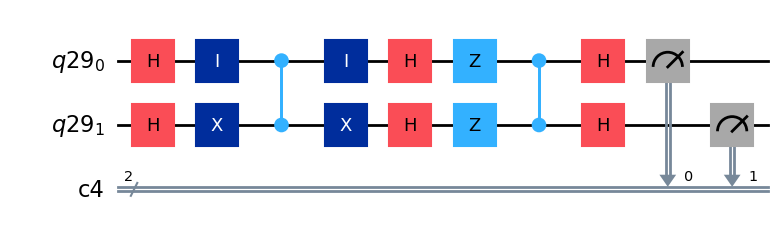

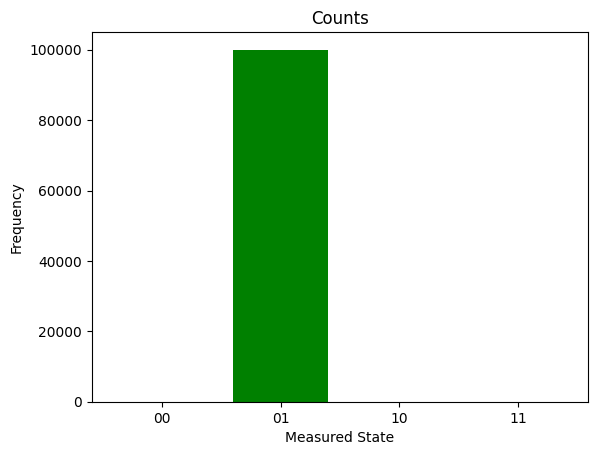

In [8]:
# circuit
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

qc = QuantumCircuit(qr, cr)

qc.h([0, 1])



qc.id(0)
qc.x(1)

qc.cz(1, 0)

qc.id(0)
qc.x(1)

qc.h([0, 1])

qc.z([0, 1])
qc.cz(1, 0)

qc.h([0, 1])

qc.measure(0, 0)
qc.measure(1, 1)

qc.draw(output='mpl')

# execution
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)

sim_result = simulator.run(compiled_circuit, shots=100000).result()
counts = sim_result.get_counts()

#visualization
visualize_result(counts)
qc.draw(output='mpl')

{'00': 0, '01': 100000, '10': 0, '11': 0}


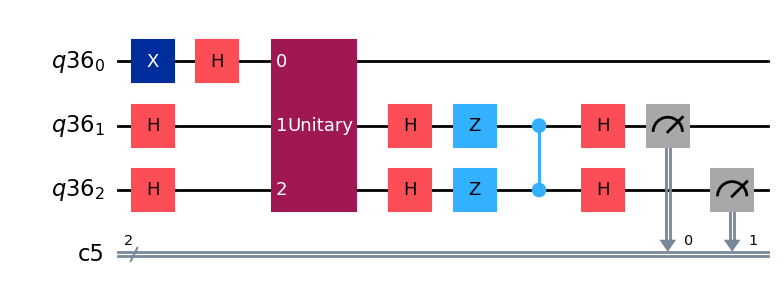

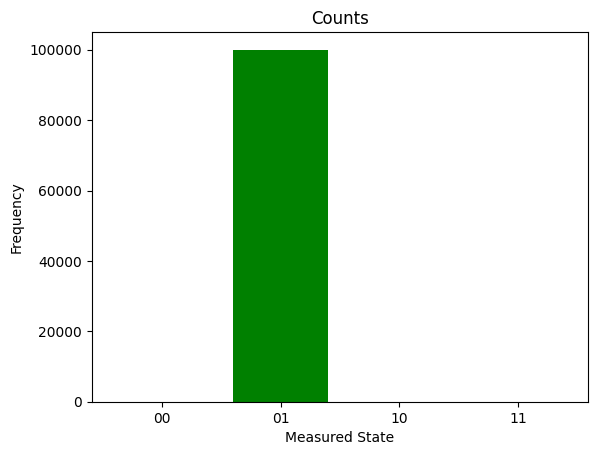

In [9]:
U_f = Operator(np.array([
    [1, 0, 0, 0, 0, 0, 0, 0], 
    [0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, -1, 0, 0, 0, 0, 0],
    [0, 0, 0, -1, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 1],
    ]))


# circuit
qr = QuantumRegister(3)
cr = ClassicalRegister(2)

qc = QuantumCircuit(qr, cr)

qc.h([1, 2])

qc.x(0)
qc.h(0)

qc.append(U_f, [0, 1, 2], [], copy=False)


qc.h([1, 2])

qc.z([1, 2])
qc.cz(2, 1)

qc.h([1, 2])

qc.measure(1, 0)
qc.measure(2, 1)

qc.draw(output='mpl')

# execution
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)

sim_result = simulator.run(compiled_circuit, shots=100000).result()
counts = sim_result.get_counts()

#visualization
visualize_result(counts)
qc.draw(output='mpl')

{'00': 0, '01': 100000, '10': 0, '11': 0}


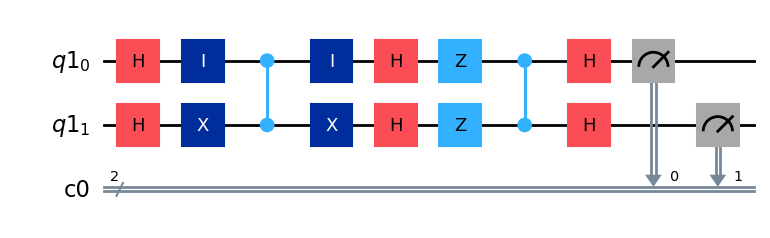

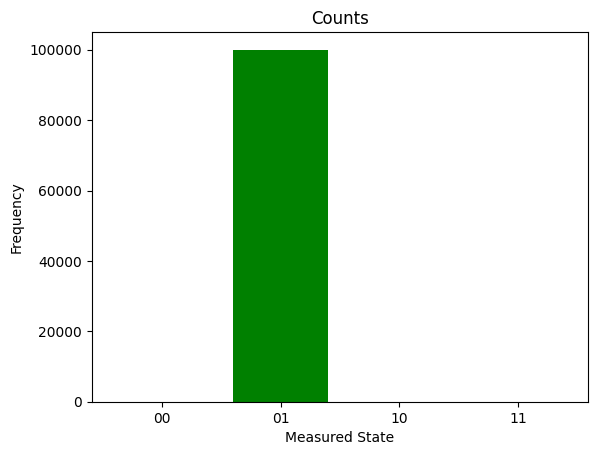

In [2]:
# circuit
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

qc = QuantumCircuit(qr, cr)

qc.h([0, 1])



qc.id(0)
qc.x(1)

qc.cz(1, 0)

qc.id(0)
qc.x(1)

qc.h([0, 1])

qc.z([0, 1])
qc.cz(1, 0)

qc.h([0, 1])

qc.measure(0, 0)
qc.measure(1, 1)

qc.draw(output='mpl')

# execution
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)

sim_result = simulator.run(compiled_circuit, shots=100000).result()
counts = sim_result.get_counts()

#visualization
visualize_result(counts)
qc.draw(output='mpl')

{'00': 25048, '01': 24964, '10': 25134, '11': 24854}


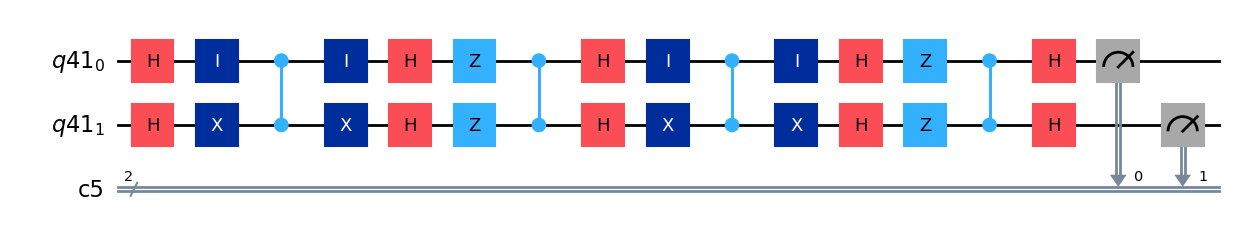

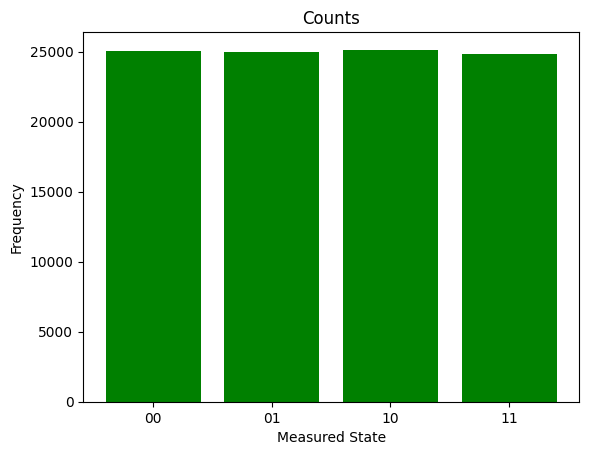

In [11]:
# circuit
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

qc = QuantumCircuit(qr, cr)

qc.h([0, 1])



qc.id(0)
qc.x(1)

qc.cz(1, 0)

qc.id(0)
qc.x(1)

qc.h([0, 1])

qc.z([0, 1])
qc.cz(1, 0)

qc.h([0, 1])


qc.id(0)
qc.x(1)

qc.cz(1, 0)

qc.id(0)
qc.x(1)

qc.h([0, 1])

qc.z([0, 1])
qc.cz(1, 0)

qc.h([0, 1])

qc.measure(0, 0)
qc.measure(1, 1)

qc.draw(output='mpl')

# execution
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)

sim_result = simulator.run(compiled_circuit, shots=100000).result()
counts = sim_result.get_counts()

#visualization
visualize_result(counts)
qc.draw(output='mpl')

In [6]:
from qiskit_aer import AerSimulator
from qiskit.circuit.library import RealAmplitudes
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import Session, SamplerV2 as Sampler, QiskitRuntimeService
 
#service = QiskitRuntimeService(token='35b43c049f5f0f75e54933aa6d682ec3779495763e0d245c8bbbef57988e554fa84a3e4c65e7268f1d489a6a23546d007e336565870981c3a8479b95039445a0')
 
# Bell Circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()
 
# Run the sampler job locally using AerSimulator.
# Session syntax is supported but ignored because local mode doesn't support sessions.
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
isa_qc = pm.run(qc)
with Session(backend=aer_sim) as session:
    sampler = Sampler()
    result = sampler.run([isa_qc]).result()

QiskitBackendNotFoundError: 'No backend matches the criteria.'

In [10]:

# circuit
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

qc = QuantumCircuit(qr, cr)

qc.h([0, 1])



qc.id(0)
qc.x(1)

qc.cz(1, 0)

qc.id(0)
qc.x(1)

qc.h([0, 1])

qc.z([0, 1])
qc.cz(1, 0)

qc.h([0, 1])


qc.id(0)
qc.x(1)

qc.cz(1, 0)

qc.id(0)
qc.x(1)

qc.h([0, 1])

qc.z([0, 1])
qc.cz(1, 0)

qc.h([0, 1])

qc.draw(output='mpl')

observable = SparsePauliOp(["ZZ"], coeffs=[1])
parameter_values = [[0], [np.pi/6], [np.pi/2]]

aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
isa_qc = pm.run(qc)

isa_observable = observable.apply_layout(isa_qc.layout)

from qiskit.primitives import StatevectorEstimator
estimator = StatevectorEstimator()



#job = estimator.run([(isa_qc, isa_observable, parameter_values)])
job = estimator.run([(isa_qc, isa_observable)])
#job = estimator.run([isa_qc])
result = job.result()
print(f" > Result class: {type(result)}")

print(f" > Expectation value: {result[0].data.evs}")
print(f" > Metadata: {result[0].metadata}")

 > Result class: <class 'qiskit.primitives.containers.primitive_result.PrimitiveResult'>
 > Expectation value: 0.0
 > Metadata: {'precision': 0.0}
